<h1><center> LOGISTIC REGRESSION MODEL



In [89]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [90]:
#Load the dataset and display the first few rows
status_data = pd.read_csv("mypersonality_cleaned.csv")
status_data.head()

,Unnamed: 0,#AUTHID,STATUS,sentiNEG,sentiPOS,sentiNEU,sentiCOMPOUND,sEXT,sNEU,sAGR,...,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY,Unnamed: 25,Unnamed: 26
0,0,b7b7764cfa1c523e4e93ab2a79a946c4,like sound thunder,0.000,0.556,0.444,0.3612,2.65,3,3.15,...,6/19/2009 15:21,180,14861.6,93.29,0.03,15661.0,0.49,0.1,NaN,NaN
1,1,b7b7764cfa1c523e4e93ab2a79a946c4,sleepy even funny thats sleep,0.000,0.420,0.580,0.4404,2.65,3,3.15,...,7/2/2009 8:41,180,14861.6,93.29,0.03,15661.0,0.49,0.1,NaN,NaN
2,2,b7b7764cfa1c523e4e93ab2a79a946c4,sore knot muscle base neck stop hurting hand y...,0.319,0.466,0.216,0.6597,2.65,3,3.15,...,6/15/2009 13:15,180,14861.6,93.29,0.03,15661.0,0.49,0.1,NaN,NaN
3,3,b7b7764cfa1c523e4e93ab2a79a946c4,like sound song,0.000,0.556,0.444,0.3612,2.65,3,3.15,...,6/22/2009 4:48,180,14861.6,93.29,0.03,15661.0,0.49,0.1,NaN,NaN
4,4,b7b7764cfa1c523e4e93ab2a79a946c4,home love,0.000,0.808,0.192,0.6369,2.65,3,3.15,...,7/20/2009 2:31,180,14861.6,93.29,0.03,15661.0,0.49,0.1,NaN,NaN


In [91]:
#Drop unnecessary columns
status_data = status_data.drop(['Unnamed: 25'], axis=1)
status_data = status_data.drop(['Unnamed: 26'], axis=1)

In [92]:
#Initialize lists and define the summarize_metrics function
p = []
r = []
a = []
f= []
b = []

def summarize_metrics(tp, tn, fp, fn):
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    f1_score = (2 * recall * precision) / (recall + precision)
    balanced_accuracy = ((tp/(tp+fn)) + (tn/(tn+fp))) / 2

    p.append(precision)
    r.append(recall)
    a.append(accuracy)
    f.append(f1_score)
    b.append(balanced_accuracy)
    print("Balanced accuracy: ",balanced_accuracy)
    print("Precison:", precision)
    print("Recall:", recall)
    print("Accuracy:", accuracy)
    print("F1 score:", f1_score)

    return p,r,a,f

In [93]:
#Drop rows with missing values and display the resulting DataFrame
status_data = status_data.dropna()
status_data

,Unnamed: 0,#AUTHID,STATUS,sentiNEG,sentiPOS,sentiNEU,sentiCOMPOUND,sEXT,sNEU,sAGR,...,cCON,cOPN,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
0,0,b7b7764cfa1c523e4e93ab2a79a946c4,like sound thunder,0.000,0.556,0.444,0.3612,2.65,3,3.15,...,n,y,6/19/2009 15:21,180,14861.6,93.29,0.03,15661.0,0.49,0.10
1,1,b7b7764cfa1c523e4e93ab2a79a946c4,sleepy even funny thats sleep,0.000,0.420,0.580,0.4404,2.65,3,3.15,...,n,y,7/2/2009 8:41,180,14861.6,93.29,0.03,15661.0,0.49,0.10
2,2,b7b7764cfa1c523e4e93ab2a79a946c4,sore knot muscle base neck stop hurting hand y...,0.319,0.466,0.216,0.6597,2.65,3,3.15,...,n,y,6/15/2009 13:15,180,14861.6,93.29,0.03,15661.0,0.49,0.10
3,3,b7b7764cfa1c523e4e93ab2a79a946c4,like sound song,0.000,0.556,0.444,0.3612,2.65,3,3.15,...,n,y,6/22/2009 4:48,180,14861.6,93.29,0.03,15661.0,0.49,0.10
4,4,b7b7764cfa1c523e4e93ab2a79a946c4,home love,0.000,0.808,0.192,0.6369,2.65,3,3.15,...,n,y,7/20/2009 2:31,180,14861.6,93.29,0.03,15661.0,0.49,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9912,9912,deb899e426c1a5c66c24eeb0d7df6257,found chinese year valentines day make two hol...,0.355,0.088,0.558,-0.7717,2.15,2.15,4.1,...,n,y,1/28/2010 11:48,36,185.71,31.21,0.40,377.0,0.32,0.63
9913,9913,ea28a927cb6663480ea33ca917c3c8ba,picture mine old,0.000,0.000,1.000,0.0000,4.05,3.35,3.8,...,y,y,2/2/2010 20:08,83,2935.76,88.40,0.08,3120.0,0.47,0.26
9914,9914,ea28a927cb6663480ea33ca917c3c8ba,filthy swine,0.000,0.000,1.000,0.0000,4.05,3.35,3.8,...,y,y,2/9/2010 20:04,83,2935.76,88.40,0.08,3120.0,0.47,0.26
9915,9915,5532642937eb3497a43e15dbb23a9d2d,propnames b rip,0.315,0.000,0.685,-0.5574,1.4,4.05,3.3,...,n,y,2/10/2010 2:01,154,11424.5,98.25,0.02,11510.0,0.49,0.05


In [94]:
status_data = status_data.drop(['STATUS', '#AUTHID', 'sEXT', 'sNEU', 'sAGR',
                                    'sCON', 'sOPN', 'DATE'], axis=1)

In [95]:
 status_data = status_data.drop(['BROKERAGE', 'BETWEENNESS', 'NBROKERAGE',
                                    'NBETWEENNESS', 'DENSITY', 'TRANSITIVITY', 'NETWORKSIZE'], axis=1)


In [96]:
status_data

,Unnamed: 0,sentiNEG,sentiPOS,sentiNEU,sentiCOMPOUND,cEXT,cNEU,cAGR,cCON,cOPN
0,0,0.000,0.556,0.444,0.3612,n,y,n,n,y
1,1,0.000,0.420,0.580,0.4404,n,y,n,n,y
2,2,0.319,0.466,0.216,0.6597,n,y,n,n,y
3,3,0.000,0.556,0.444,0.3612,n,y,n,n,y
4,4,0.000,0.808,0.192,0.6369,n,y,n,n,y
...,...,...,...,...,...,...,...,...,...,...
9912,9912,0.355,0.088,0.558,-0.7717,n,n,y,n,y
9913,9913,0.000,0.000,1.000,0.0000,y,y,y,y,y
9914,9914,0.000,0.000,1.000,0.0000,y,y,y,y,y
9915,9915,0.315,0.000,0.685,-0.5574,n,y,n,n,y


In [98]:
#Renaming First column
new_columns = status_data.columns.values
new_columns[0] = "rowID"
status_data.columns = new_columns

In [99]:
#Retrieve and Reorder Columns:
cols = status_data.columns.tolist()
cols = cols[:5] + cols[5:10]
#Subset DataFrame Based on Reordered Columns:
status_data = status_data[cols]
status_data

,rowID,sentiNEG,sentiPOS,sentiNEU,sentiCOMPOUND,cEXT,cNEU,cAGR,cCON,cOPN
0,0,0.000,0.556,0.444,0.3612,n,y,n,n,y
1,1,0.000,0.420,0.580,0.4404,n,y,n,n,y
2,2,0.319,0.466,0.216,0.6597,n,y,n,n,y
3,3,0.000,0.556,0.444,0.3612,n,y,n,n,y
4,4,0.000,0.808,0.192,0.6369,n,y,n,n,y
...,...,...,...,...,...,...,...,...,...,...
9912,9912,0.355,0.088,0.558,-0.7717,n,n,y,n,y
9913,9913,0.000,0.000,1.000,0.0000,y,y,y,y,y
9914,9914,0.000,0.000,1.000,0.0000,y,y,y,y,y
9915,9915,0.315,0.000,0.685,-0.5574,n,y,n,n,y


In [100]:
#identifying whether there are any missing values and extracting rows that contain these missing values for further examination or processing.
status_data.isnull().values.any()
status_data[status_data.isna().any(axis=1)]

,rowID,sentiNEG,sentiPOS,sentiNEU,sentiCOMPOUND,cEXT,cNEU,cAGR,cCON,cOPN


In [101]:
status_data

,rowID,sentiNEG,sentiPOS,sentiNEU,sentiCOMPOUND,cEXT,cNEU,cAGR,cCON,cOPN
0,0,0.000,0.556,0.444,0.3612,n,y,n,n,y
1,1,0.000,0.420,0.580,0.4404,n,y,n,n,y
2,2,0.319,0.466,0.216,0.6597,n,y,n,n,y
3,3,0.000,0.556,0.444,0.3612,n,y,n,n,y
4,4,0.000,0.808,0.192,0.6369,n,y,n,n,y
...,...,...,...,...,...,...,...,...,...,...
9912,9912,0.355,0.088,0.558,-0.7717,n,n,y,n,y
9913,9913,0.000,0.000,1.000,0.0000,y,y,y,y,y
9914,9914,0.000,0.000,1.000,0.0000,y,y,y,y,y
9915,9915,0.315,0.000,0.685,-0.5574,n,y,n,n,y


In [102]:
#converting categorical data (like 'y' and 'n') into numerical form suitable for further analysis or modeling.
features = ['cEXT', 'cNEU', 'cOPN', 'cAGR', 'cCON']
for feature in features:
  status_data[feature] = status_data[feature].map({'y': 1.0, 'n': 0.0}).fillna(0).astype(int)

In [103]:
print(status_data.shape)

(9856, 10)


In [104]:
status_data

,rowID,sentiNEG,sentiPOS,sentiNEU,sentiCOMPOUND,cEXT,cNEU,cAGR,cCON,cOPN
0,0,0.000,0.556,0.444,0.3612,0,1,0,0,1
1,1,0.000,0.420,0.580,0.4404,0,1,0,0,1
2,2,0.319,0.466,0.216,0.6597,0,1,0,0,1
3,3,0.000,0.556,0.444,0.3612,0,1,0,0,1
4,4,0.000,0.808,0.192,0.6369,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
9912,9912,0.355,0.088,0.558,-0.7717,0,0,1,0,1
9913,9913,0.000,0.000,1.000,0.0000,1,1,1,1,1
9914,9914,0.000,0.000,1.000,0.0000,1,1,1,1,1
9915,9915,0.315,0.000,0.685,-0.5574,0,1,0,0,1


In [105]:
#split the status_data DataFrame into two separate sets: a training set (train_data) and a test set (test_data)
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(status_data, test_size=0.50,random_state=42)


In [106]:
train = train_data.values
test = test_data.values

**Applying Logistic Regression model**

Imports the LogisticRegression class from scikit-learn, which is used for logistic regression—a statistical method for predicting binary outcomes. Logistic regression models the probability of a certain class or event occurring based on independent variables.

In [107]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = model.fit(train[0:,1:5],train[0:,7])

In [108]:
# predicts the values of the "cOPN" column using the trained model (model) on the test data
output = model.predict(test[:, 1:5])
rowID = [TEST.rowID for TEST in test_data.itertuples()]
result_df = pd.DataFrame({"rowID": rowID,"cOPN": list(output)})

In [109]:
 # Build the confusion matrix to assess the model
tp_count = 0
tn_count = 0
fp_count = 0
fn_count = 0
for row in rowID:
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)
  if test_cEXT_val == 1:
    if result_cEXT_val == 1:
        tp_count += 1
    else:
        fn_count += 1
  else:
    if result_cEXT_val == 1:
        fp_count += 1
    else:
        tn_count += 1


<ipython-input-109-c0b7aab48b93>:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-109-c0b7aab48b93>:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


3524 63 1154 187


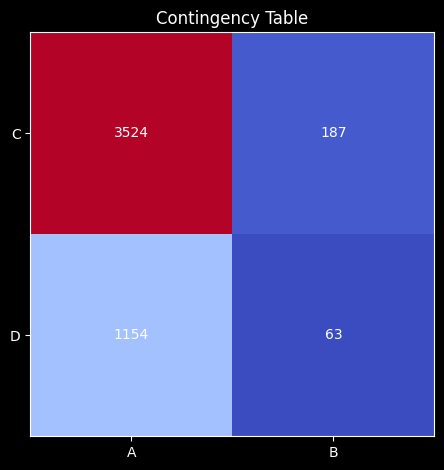

In [110]:
#illustrating counts of true positives, true negatives, false positives, and false negatives in a classification context.
print(tp_count, tn_count, fp_count, fn_count)


data = np.array([[tp_count, fn_count ], [fp_count, tn_count ]])

fig, ax = plt.subplots()
im = ax.imshow(data, cmap='coolwarm')

ax.set_xticks(np.arange(len(['A', 'B'])))
ax.set_yticks(np.arange(len(['C', 'D'])))

ax.set_xticklabels(['A', 'B'])
ax.set_yticklabels(['C', 'D'])

for i in range(len(['A', 'B'])):
    for j in range(len(['C', 'D'])):
        text = ax.text(j, i, data[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Contingency Table")
fig.tight_layout()
plt.show()

In [111]:
#after adding random state
summarize_metrics(tp_count, tn_count, fp_count, fn_count)

Balanced accuracy:  0.5006879545077627
Precison: 0.7533133817870885
Recall: 0.9496092697386149
Accuracy: 0.7278814935064936
F1 score: 0.8401478126117534


([0.7533133817870885],
 [0.9496092697386149],
 [0.7278814935064936],
 [0.8401478126117534])

Performing repeated logistic regression modeling and evaluation across different test sizes, aiming to visualize the performance metrics (true positives, true negatives, false positives, false negatives) for predicting "cOPN" values based on social metrics in the dataset.

In [112]:
#visualizing Social metrics at different test size and sample size

test_size = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]

for i in test_size :
    train_data, test_data = train_test_split(status_data, test_size=i,random_state=42)
    train = train_data.values
    test = test_data.values
    cmodel =LogisticRegression()
    model = cmodel.fit(train[0:,1:5],train[0:,7])
    output = model.predict(test[:, 1:5])
    rowID = [TEST.rowID for TEST in test_data.itertuples()]
    result_df = pd.DataFrame({"rowID": rowID,
                                  "cOPN": list(output)})
    tp_count = 0
    tn_count = 0
    fp_count = 0
    fn_count = 0
    for row in rowID:
      test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
      result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)
      if test_cEXT_val == 1:
        if result_cEXT_val == 1:
            tp_count += 1
        else:
            fn_count += 1
      else:
        if result_cEXT_val == 1:
            fp_count += 1
        else:
            tn_count += 1

    x = summarize_metrics(tp_count, tn_count, fp_count, fn_count)


<ipython-input-112-2efbe1cb25fd>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-112-2efbe1cb25fd>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.4997195994586113
Precison: 0.743298969072165
Recall: 0.9836289222373806
Accuracy: 0.7352941176470589
F1 score: 0.8467410452143277


<ipython-input-112-2efbe1cb25fd>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-112-2efbe1cb25fd>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.4983596258550887
Precison: 0.7444598337950139
Recall: 0.9754990925589837
Accuracy: 0.7322515212981744
F1 score: 0.8444619010212098


<ipython-input-112-2efbe1cb25fd>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-112-2efbe1cb25fd>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.5007389292563205
Precison: 0.7452229299363057
Recall: 0.9557522123893806
Accuracy: 0.723630831643002
F1 score: 0.8374589919475096


<ipython-input-112-2efbe1cb25fd>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-112-2efbe1cb25fd>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.49968246817100803
Precison: 0.744602851323829
Recall: 0.9961852861035423
Accuracy: 0.7426948051948052
F1 score: 0.8522144522144522


<ipython-input-112-2efbe1cb25fd>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-112-2efbe1cb25fd>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.49978018209984265
Precison: 0.7513550135501355
Recall: 0.9981998199819982
Accuracy: 0.7504227257355428
F1 score: 0.8573637417858523


<ipython-input-112-2efbe1cb25fd>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-112-2efbe1cb25fd>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.5005921493812241
Precison: 0.7503741394791978
Recall: 0.9687017001545595
Accuracy: 0.7347826086956522
F1 score: 0.8456738067127677


<ipython-input-112-2efbe1cb25fd>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-112-2efbe1cb25fd>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.5012261063806988
Precison: 0.7509196006305833
Recall: 0.965866846907739
Accuracy: 0.7339589145320822
F1 score: 0.8449371766444937


<ipython-input-112-2efbe1cb25fd>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-112-2efbe1cb25fd>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.49899444081098754
Precison: 0.7516276826621654
Recall: 0.9343525179856115
Accuracy: 0.7184400360685302
F1 score: 0.8330883335560604


<ipython-input-112-2efbe1cb25fd>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-112-2efbe1cb25fd>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.5006879545077627
Precison: 0.7533133817870885
Recall: 0.9496092697386149
Accuracy: 0.7278814935064936
F1 score: 0.8401478126117534


<ipython-input-112-2efbe1cb25fd>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-112-2efbe1cb25fd>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.4992132819558284
Precison: 0.7495211747180252
Recall: 0.8664206642066421
Accuracy: 0.6827153661686036
F1 score: 0.8037425832952989


<ipython-input-112-2efbe1cb25fd>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-112-2efbe1cb25fd>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.5016887365595327
Precison: 0.7501478998225202
Recall: 0.8583032490974729
Accuracy: 0.6795738924585729
F1 score: 0.8005892875933915


<ipython-input-112-2efbe1cb25fd>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-112-2efbe1cb25fd>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.5052215306316111
Precison: 0.75
Recall: 0.8304801670146138
Accuracy: 0.6663024816606836
F1 score: 0.7881910045571627


<ipython-input-112-2efbe1cb25fd>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-112-2efbe1cb25fd>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.5042320288117795
Precison: 0.7471751412429378
Recall: 0.823026059898872
Accuracy: 0.6605797101449276
F1 score: 0.7832685545067555


<ipython-input-112-2efbe1cb25fd>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-112-2efbe1cb25fd>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.5005498637797949
Precison: 0.7461912479740681
Recall: 0.8349655422560754
Accuracy: 0.66504329004329
F1 score: 0.7880862718247177


<ipython-input-112-2efbe1cb25fd>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-112-2efbe1cb25fd>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.49614156566952583
Precison: 0.7408284023668639
Recall: 0.8553373185311699
Accuracy: 0.6703868103994927
F1 score: 0.7939754260800633


<ipython-input-112-2efbe1cb25fd>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-112-2efbe1cb25fd>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.4981768359736676
Precison: 0.7437428896473265
Recall: 0.8384097467136903
Accuracy: 0.6645977560276916
F1 score: 0.7882441597588545


<ipython-input-112-2efbe1cb25fd>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-112-2efbe1cb25fd>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.4998821512521214
Precison: 0.7424863387978142
Recall: 0.9901320783361166
Accuracy: 0.7376845902378537
F1 score: 0.8486110207533667


<ipython-input-112-2efbe1cb25fd>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-112-2efbe1cb25fd>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.5
Precison: 0.7422041862451944
Recall: 1.0
Accuracy: 0.7422041862451944
F1 score: 0.8520289322054676


In [113]:
#value deleter
#delete the first element from each of the lists p, r, a, f, and b
p.pop(0)
r.pop(0)
a.pop(0)
f.pop(0)
b.pop(0)

0.5006879545077627

In [115]:
print(b)
print(len(b))

[0.4997195994586113, 0.4983596258550887, 0.5007389292563205, 0.49968246817100803, 0.49978018209984265, 0.5005921493812241, 0.5012261063806988, 0.49899444081098754, 0.5006879545077627, 0.4992132819558284, 0.5016887365595327, 0.5052215306316111, 0.5042320288117795, 0.5005498637797949, 0.49614156566952583, 0.4981768359736676, 0.4998821512521214, 0.5]
18


**Plot against Accuracy Scores**

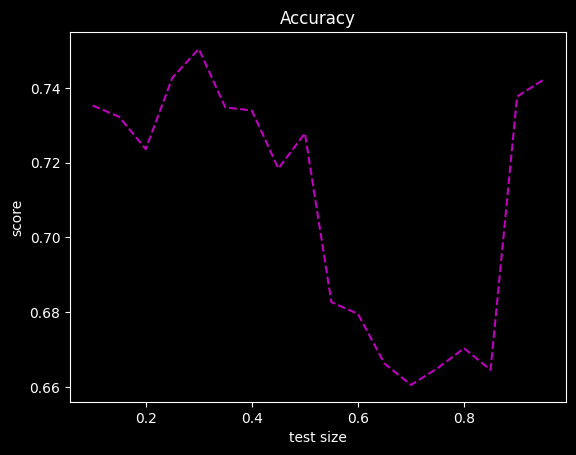

In [116]:
import matplotlib.pyplot as plt


plt.style.use("dark_background")
plt.xlabel("test size")
plt.ylabel("score")
plt.title("Accuracy")
plt.plot(test_size,a,'m--')

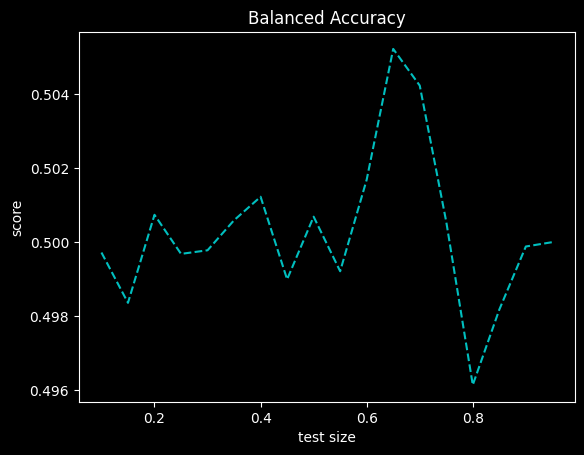

In [117]:


plt.style.use("dark_background")
plt.xlabel("test size")
plt.ylabel("score")
plt.title("Balanced Accuracy")
plt.plot(test_size,b,'c--')

**Plot against Recall Scores**

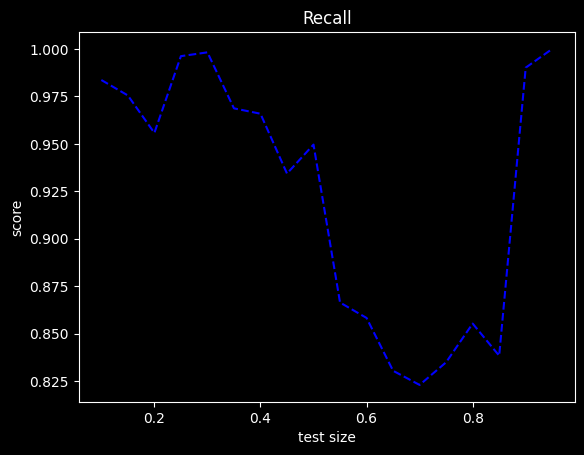

In [118]:
plt.style.use("dark_background")
plt.xlabel("test size")
plt.ylabel("score")
plt.title("Recall")
plt.plot(test_size,r,'b--')

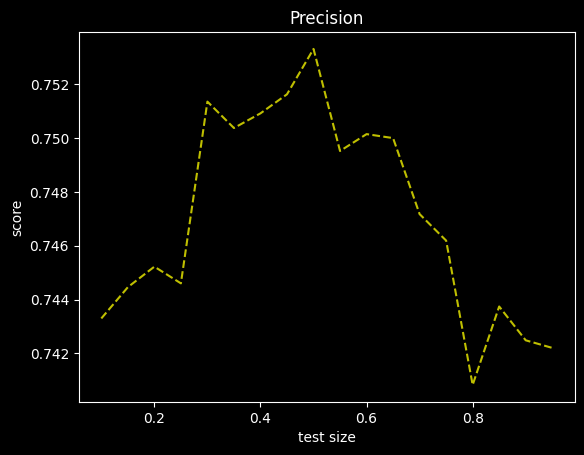

In [119]:
plt.style.use("dark_background")
plt.xlabel("test size")
plt.ylabel("score")
plt.title("Precision")
plt.plot(test_size,p,'y--')

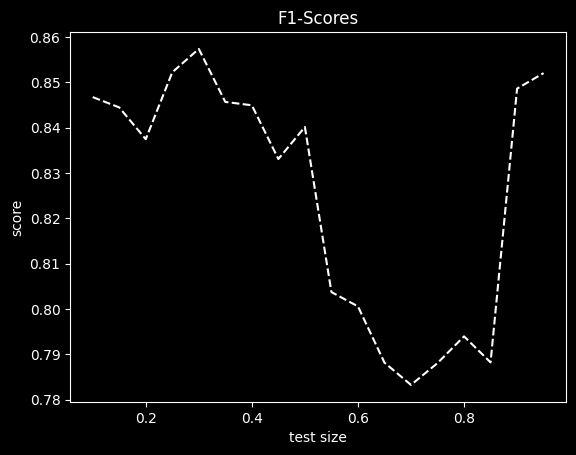

In [120]:
plt.style.use("dark_background")
plt.xlabel("test size")
plt.ylabel("score")
plt.title("F1-Scores")
plt.plot(test_size,f,'w--')